In [1]:
setwd('/import/DB/zhang//data')
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [2]:
SCE = readRDS('Mye.final.rds')

In [3]:
Idents(SCE) ='celltype'

In [4]:
table(SCE$group,SCE$celltype)

         
          M1_mac M2_mac  OCs TAM1 TAM2 cDC1 cDC2 prof mac
  OS        1697   4102  516 2124  732  158 2165      317
  control    664    443   68    8  301  135  561       27

In [6]:
source('/import/code/OS/Victor.R')

Warning message:
"package 'stringr' was built under R version 4.2.3"

Attaching package: 'igraph'


The following object is masked from 'package:circlize':

    degree


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




In [7]:
pbmc = SCE

In [8]:
VEC = pbmc@reductions$umap@cell.embeddings
rownames(VEC) = colnames(pbmc)
PCA = pbmc@reductions$pca@cell.embeddings

In [9]:
PCA=vector.rankPCA(PCA)

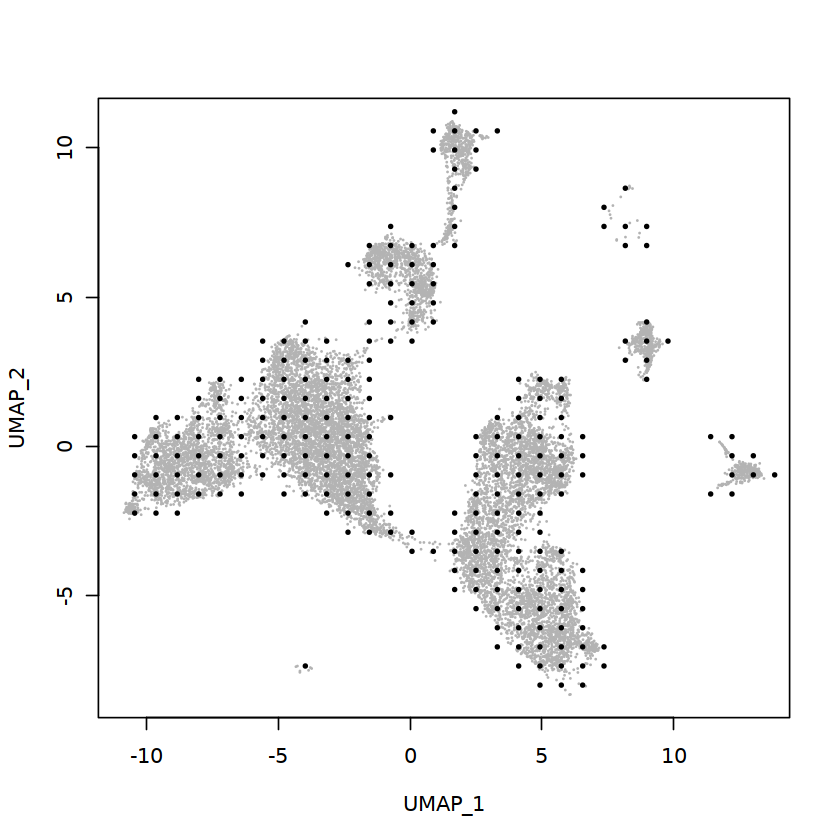

In [10]:
# Define pixel
OUT=vector.buildGrid(VEC, N=30,SHOW=TRUE)

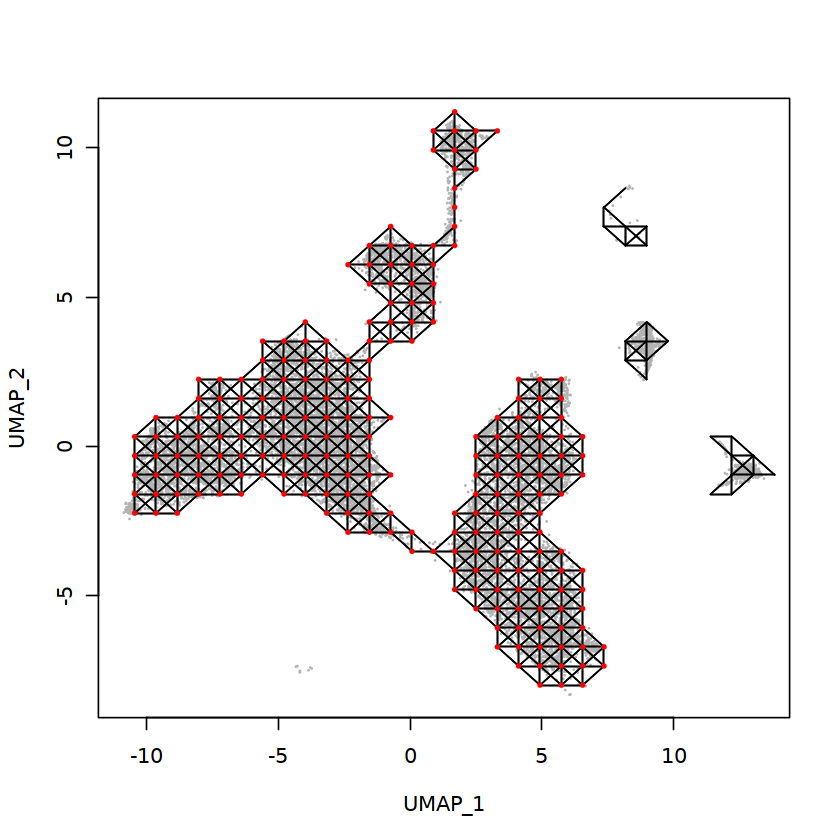

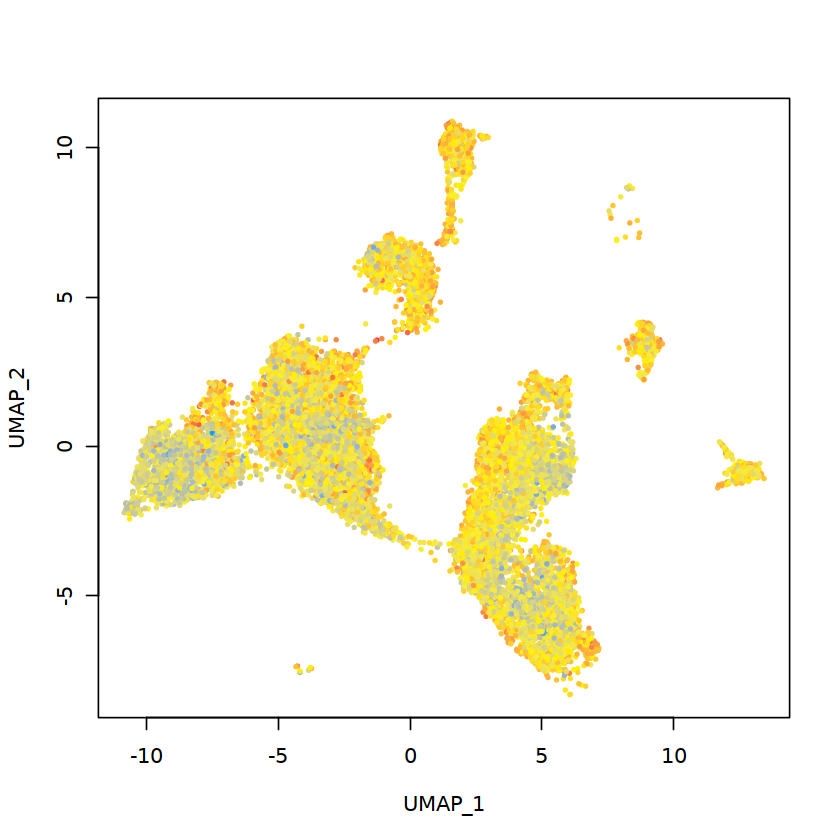

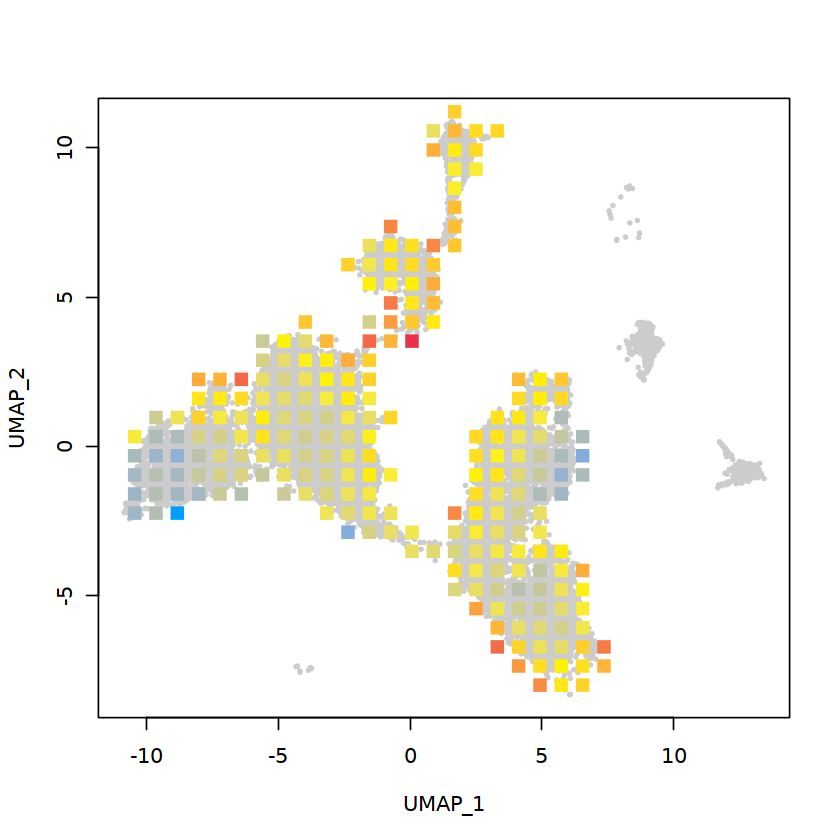

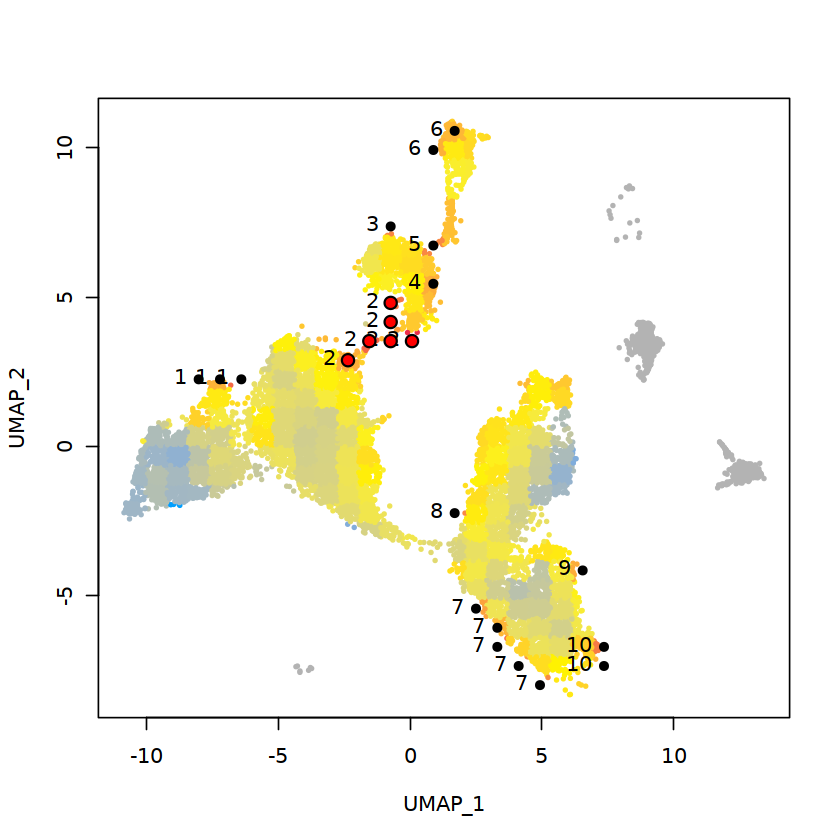

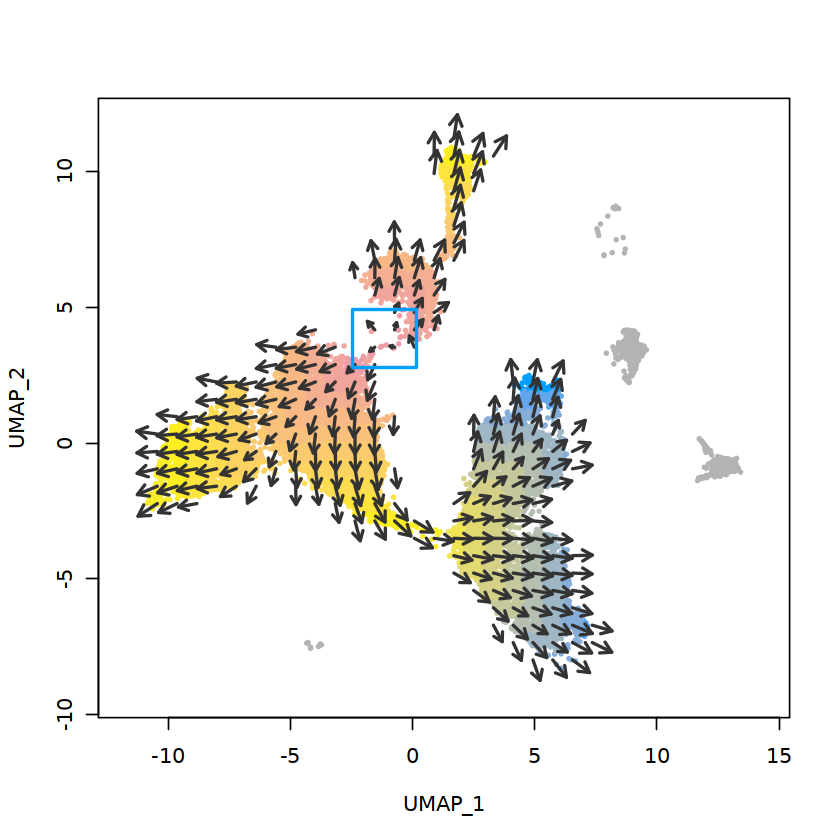

In [11]:
# Build network
OUT=vector.buildNet(OUT, CUT=1, SHOW=TRUE)
# Calculate Quantile Polarization (QP) score
OUT=vector.getValue(OUT, PCA, SHOW=TRUE)
# Get pixel's QP score
OUT=vector.gridValue(OUT,SHOW=TRUE)
# Find starting point
OUT=vector.autoCenter(OUT,UP=0.9,SHOW=TRUE)
# Infer vector
OUT=vector.drawArrow(OUT,P=0.9,SHOW=TRUE, COL=OUT$COL, SHOW.SUMMIT=TRUE)

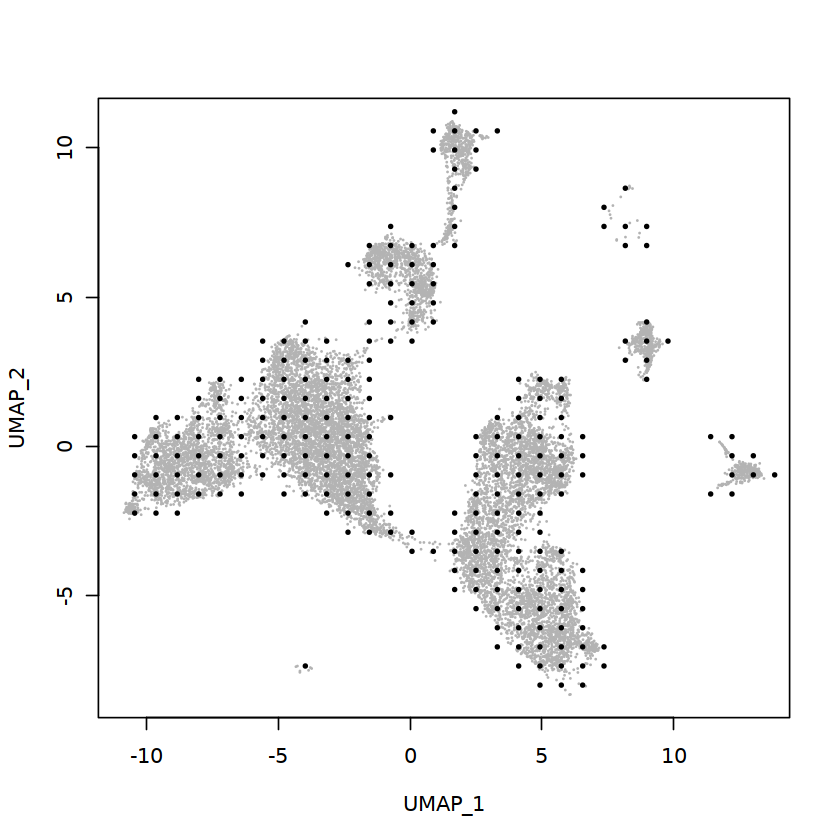

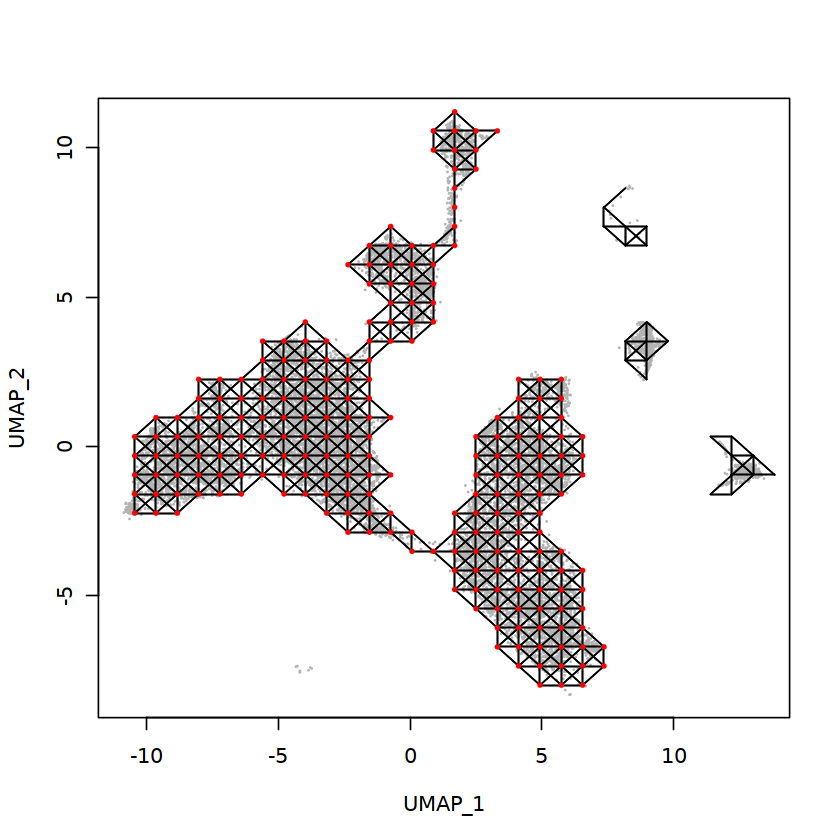

Warning message in min(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to min; returning Inf"
Warning message in max(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to max; returning -Inf"
Warning message in min(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to min; returning Inf"


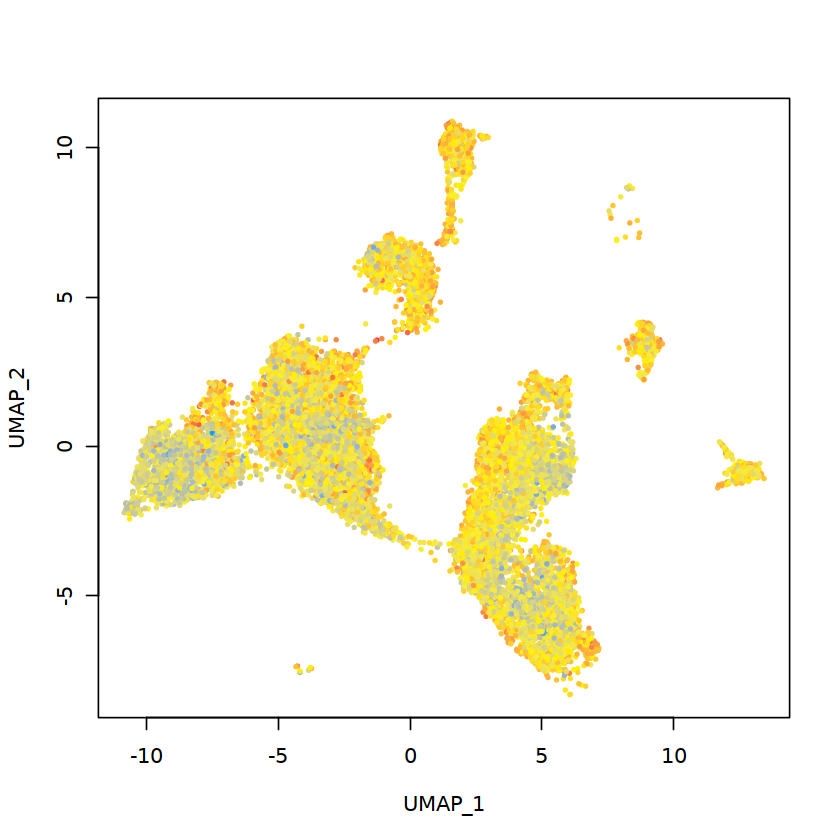

Warning message in min(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to min; returning Inf"
Warning message in max(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to max; returning -Inf"
Warning message in min(numeric(0), ..., na.rm = na.rm):
"no non-missing arguments to min; returning Inf"


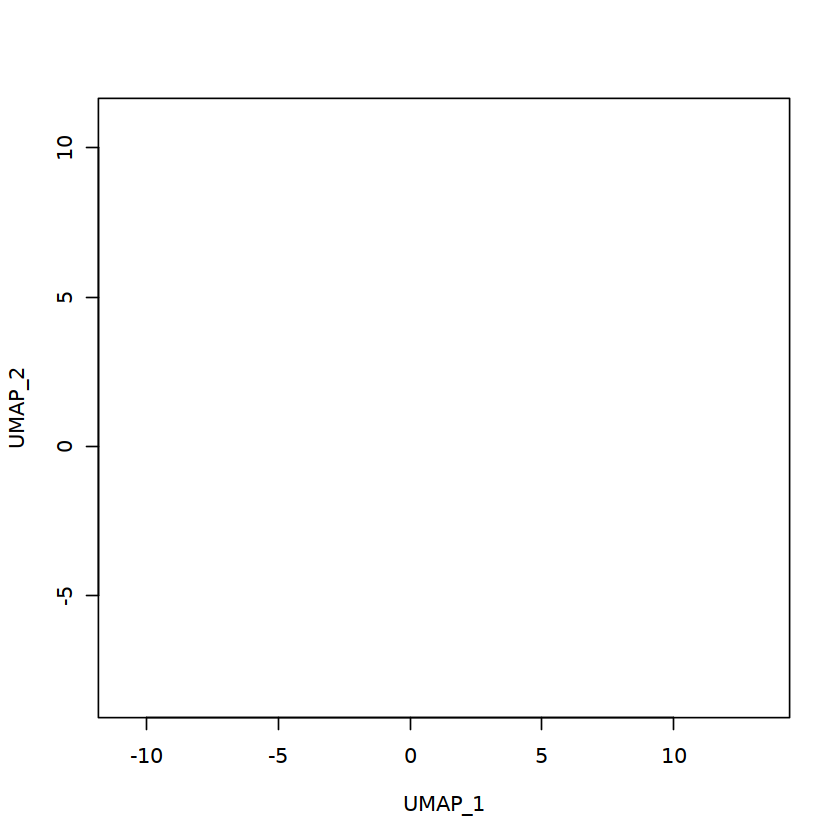

ERROR: Error in quantile.default(USED_CENTER_VALUE, UP): missing values and NaN's not allowed if 'na.rm' is FALSE


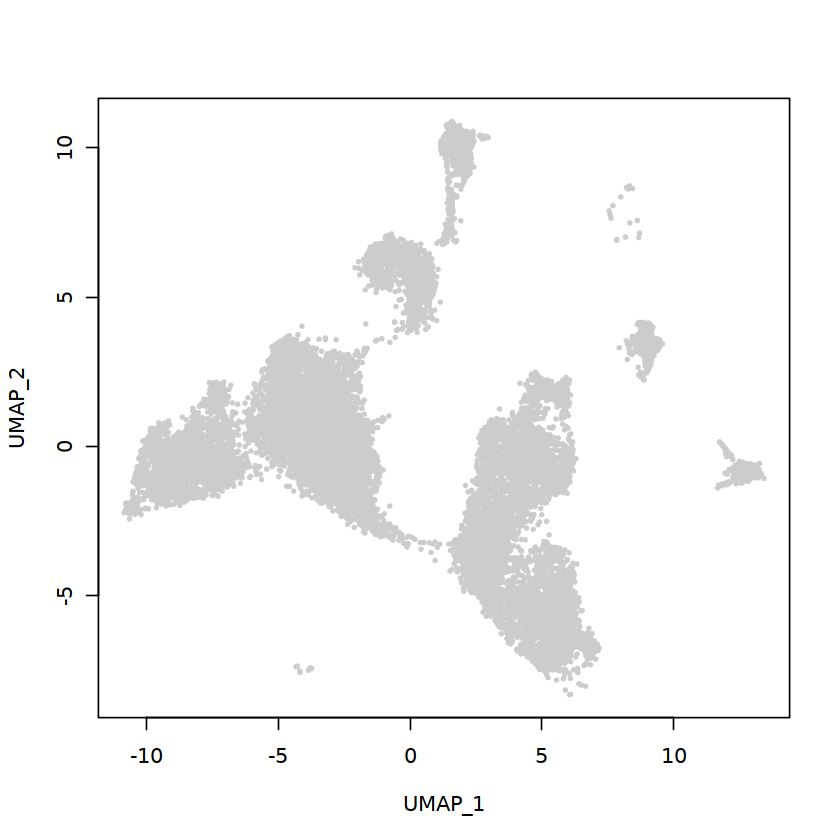

In [12]:
NES.EXP = pbmc@assays$RNA@data[which(rownames(pbmc) =='prof_mac'),]
OUT=vector.buildGrid(VEC, N=30,SHOW=TRUE)
OUT=vector.buildNet(OUT, CUT=1, SHOW=TRUE)
OUT=vector.getValue(OUT, PCA, SHOW=TRUE)

OUT$VALUE=NES.EXP

OUT=vector.showValue(OUT)
OUT=vector.gridValue(OUT, SHOW=TRUE)
OUT=vector.autoCenter(OUT,UP=0.9,SHOW=TRUE)
OUT=vector.drawArrow(OUT,P=0.9,SHOW=TRUE, COL=OUT$COL)